# import packages
Let's start by importing the following packages!
* requests
* BeautifulSoup
* seaborn
* matplotlib
* pandas
* re

In [1]:
# import package

import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib as plt
import pandas as pd
import re

# crawler THSR information
Let's start to crawl the imformation of each station of THSR!
* Target web: [THSR Homepage](https://www.thsrc.com.tw)  
* Choose each station:
    1. Homepage -> Travel Information -> Stations
    2. choose different stations by changing url
* Task:
    1. crawler the name, address, operation hours and ticketing hours of each station
    2. organize into a DataFrame

In [2]:
# setting each station name and their url

r1 = requests.get("https://www.thsrc.com.tw/ArticleContent/2f940836-cedc-41ef-8e28-c2336ac8fe68")
r2 = requests.get("https://www.thsrc.com.tw/ArticleContent/977abb69-413a-4ccf-a109-0272c24fd490")
r3 = requests.get("https://www.thsrc.com.tw/ArticleContent/e6e26e66-7dc1-458f-b2f3-71ce65fdc95f")
r4 = requests.get("https://www.thsrc.com.tw/ArticleContent/fbd828d8-b1da-4b06-a3bd-680cdca4d2cd")

r5 = requests.get("https://www.thsrc.com.tw/ArticleContent/a7a04c89-900b-4798-95a3-c01c455622f4")
r6 = requests.get("https://www.thsrc.com.tw/ArticleContent/e8fc2123-2aaf-46ff-ad79-51d4002a1ef3")
r7 = requests.get("https://www.thsrc.com.tw/ArticleContent/3301e395-46b8-47aa-aa37-139e15708779")
r8 = requests.get("https://www.thsrc.com.tw/ArticleContent/38b8c40b-aef0-4d66-b257-da96ec51620e")

r9 = requests.get("https://www.thsrc.com.tw/ArticleContent/5f4c7bb0-c676-4e39-8d3c-f12fc188ee5f")
r10 = requests.get("https://www.thsrc.com.tw/ArticleContent/60831846-f0e4-47f6-9b5b-46323ebdcef7")
r11 = requests.get("https://www.thsrc.com.tw/ArticleContent/9c5ac6ca-ec89-48f8-aab0-41b738cb1814")
r12 = requests.get("https://www.thsrc.com.tw/ArticleContent/f2519629-5973-4d08-913b-479cce78a356")


stationName = ["南港", "臺北", "板橋", "桃園", "新竹", "苗栗", "臺中", "彰化", "雲林", "嘉義", "臺南", "左營"]
stationName = pd.Series(stationName)


r = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12]

soup = []

for i in range(len(r)):
    soup.append(BeautifulSoup(r[i].text, "html.parser"))

In [3]:
# crawler the address of each station

addrs = []

for i in range(len(soup)):
    addrs.append(soup[i].find(class_ = "google-map-link orange").text)
    
addrs = pd.Series(addrs)

In [4]:
# crawler the operation hours and ticketing hours of each station

opHours = []
ticketHours = []

for i in range(len(soup)):
    opHours.append(re.search("\d+:\d+ ~ \d+:\d+", soup[i].find_all(class_ = "gray")[0].text).group(0))
    if re.search("\d+:\d+ ~ \w+", soup[i].find_all(class_ = "gray")[1].text) != None:
        ticketHours.append(re.search("\d+:\d+ ~ \w+", soup[i].find_all(class_ = "gray")[1].text).group(0))
    else:
        ticketHours.append(re.search("\d+:\d+~\w+", soup[i].find_all(class_ = "gray")[1].text).group(0))
    
opHours = pd.Series(opHours)
ticketHours = pd.Series(ticketHours)

In [5]:
# create a DataFrame

station = pd.DataFrame({"station": stationName, "address": addrs,
                        "operation_hours": opHours, "ticketing_hours": ticketHours})
station

,station,address,operation_hours,ticketing_hours
0,南港,台北市南港區南港路一段313號,05:50 ~ 24:00,05:50 ~ 末班車發車時間
1,臺北,台北市北平西路3號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
2,板橋,新北市板橋區縣民大道二段7號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
3,桃園,桃園市中壢區高鐵北路一段6號,06:20 ~ 23:45,06:20 ~ 末班車發車時間
4,新竹,新竹縣竹北市高鐵七路6號,06:15 ~ 23:45,06:15 ~ 末班車發車時間
5,苗栗,苗栗縣後龍鎮高鐵三路268號,06:05 ~ 23:45,06:05 ~ 末班車發車時間
6,臺中,台中市烏日區站區二路8號,05:40 ~ 24:00,05:40 ~ 末班車發車時間
7,彰化,彰化縣田中鎮站區路二段99號,06:20 ~ 24:00,06:20~末班車發車時間
8,雲林,雲林縣虎尾鎮站前東路301號,06:15 ~ 23:45,06:15~末班車發車時間
9,嘉義,嘉義縣太保市高鐵西路168號,06:00 ~ 23:45,06:00~末班車發車時間


# Crawler GDP and CPI
Let's start to crawl GDP and CPI!
* Target web: 
    1. [Wiki GDP](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal))  
    2. [Wiki CPI](https://en.wikipedia.org/wiki/Corruption_Perceptions_Index)
* Task:
    1. crawler GDP table (top 50: United States ~ New Zealand)
    2. organize into a DataFrame (columns: Country, Region, IMF_Estimate, IMF_Year, United_Nations_Estimate, United_Nations_Year, World_Bank_Estimate, World_Bank_Year)
    3. crawler CPI table which contains country and 2020 CPI (top 100: Denmark ~ Suriname)
    4. organize into a DataFrame (columns: Country, CPI_2020)
    5. merge GDP(DataFrame) and CPI(DataFrame), based on Country of GDP
    6. plot and text the names of GDP top 10 countrys

In [6]:
# crawler GDP

gdpSite = requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)") # get the website

gdpText = BeautifulSoup(gdpSite.text, "html.parser")                                       # get the text

gdpDF = gdpText.find("table", "a", class_ = "wikitable").text                              # get the information
gdpCountry = re.findall("\w+", gdpDF)                                                      # remove things we don't need
gdpYear = re.findall("\d+", gdpDF)                                                         # remove things we don't need
gdpDF = gdpDF.replace(",", "")                                                             # remove "," between numbers
gdpEstimate = re.findall("\d+", gdpDF)                                                     # remove things we don't need



# country & region
gdpCountryCopy = []

for i in range(len(gdpCountry)):                                                           # copy gdpCountry
    gdpCountryCopy.append(gdpCountry[i])

for i in range(len(gdpCountry)):                                                           # get all the countries and regions
    if i <= 22:
        gdpCountryCopy.remove(gdpCountry[i])
    elif gdpCountry[i].isdigit() == True:
        gdpCountryCopy.remove(gdpCountry[i])
    elif len(gdpCountry[i]) == 1:
        gdpCountryCopy.remove(gdpCountry[i])
        
        
gdpCountry = []
gdpRegion = []

skip = False

for i in range(len(gdpCountryCopy)):                                                       # extract countries and regions respectively 
    if skip == True:
        skip = False
        continue
    elif gdpCountryCopy[i] == "Emirates":
        continue
    elif gdpCountryCopy[i] == "Asia" or gdpCountryCopy[i] == "Europe" or gdpCountryCopy[i] == "Oceania" or gdpCountryCopy[i] == "Americas" or gdpCountryCopy[i] == "Africa":
        gdpRegion.append(gdpCountryCopy[i])
    elif gdpCountryCopy[i+1] != "Asia" and gdpCountryCopy[i+1] != "Europe" and gdpCountryCopy[i+1] != "Oceania" and gdpCountryCopy[i+1] != "Americas" and gdpCountryCopy[i+1] != "Africa":
        if gdpCountryCopy[i+2] == "Emirates":
            gdpCountry.append(gdpCountryCopy[i] + " " + gdpCountryCopy[i+1] + " " + gdpCountryCopy[i+2])
        else:
            gdpCountry.append(gdpCountryCopy[i] + " " + gdpCountryCopy[i+1])
        skip = True
    else:
        if gdpCountryCopy[i+1] == "Africa" and gdpCountryCopy[i+2] == "Africa":
            gdpCountry.append(gdpCountryCopy[i] + " " + gdpCountryCopy[i+1])
            skip = True
        else:
            gdpCountry.append(gdpCountryCopy[i])

gdpCountry = pd.Series(gdpCountry[:50])                                                    # turn list into series
gdpRegion = pd.Series(gdpRegion[:50])                                                      # turn list into series



# year
gdpYearCopy = []

for i in range(len(gdpYear)):
    gdpYearCopy.append(gdpYear[i])

for i in range(len(gdpYearCopy)):                                                          # find all the years
    if len(gdpYearCopy[i]) != 4:
        gdpYear.remove(gdpYearCopy[i])
        
IMF_Year = []
United_Nations_Year = []
World_Bank_Year = []

for i in range(len(gdpYear)):                                                              # distribute the years into 3 catagories
    if i == 150:
        break
    if i % 3 == 0:
        IMF_Year.append(gdpYear[i])
    elif i % 3 == 1:
        United_Nations_Year.append(gdpYear[i])
    else:
        World_Bank_Year.append(gdpYear[i])

IMF_Year = pd.Series(IMF_Year)                                                             # turn list into series
United_Nations_Year = pd.Series(United_Nations_Year)                                       # turn list into series
World_Bank_Year = pd.Series(World_Bank_Year)                                               # turn list into series



# estimate
gdpEstimateCopy = []

for i in range(len(gdpEstimate)):
    gdpEstimateCopy.append(gdpEstimate[i])
    
for i in range(len(gdpEstimateCopy)):                                                      # find all the estimates
    if len(gdpEstimateCopy[i]) <= 5:
        gdpEstimate.remove(gdpEstimateCopy[i])
        
IMF_Estimate = []
United_Nations_Estimate = []
World_Bank_Estimate = []

for i in range(len(gdpEstimate)):                                                          # distribute the estimates into 3 catagories
    if i == 150:
        break
    if i % 3 == 0:
        IMF_Estimate.append(gdpEstimate[i])
    elif i % 3 == 1:
        United_Nations_Estimate.append(gdpEstimate[i])
    else:
        World_Bank_Estimate.append(int(gdpEstimate[i]))

IMF_Estimate = pd.Series(IMF_Estimate)                                                     # turn list into series
United_Nations_Estimate = pd.Series(United_Nations_Estimate)                               # turn list into series
World_Bank_Estimate = pd.Series(World_Bank_Estimate)                                       # turn list into series

# gdpCountryCopy

In [7]:
# create GDP DataFrame

gdp = pd.DataFrame({"Country": gdpCountry, "Region": gdpRegion,
                    "IMF_Estimate": IMF_Estimate, "IMF_Year": IMF_Year,
                    "United_Nations_Estimate": United_Nations_Estimate, "United_Nations_Year": United_Nations_Year,
                    "World_Bank_Estimate": World_Bank_Estimate, "World_Bank_Year": World_Bank_Year})
gdp

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year
0,United States,Americas,22675271,2021,21433226,2019,20936600,2020
1,China,Asia,16642318,2021,14342933,2019,14722731,2020
2,Japan,Asia,5378136,2021,5082465,2019,4975415,2020
3,Germany,Europe,4319286,2021,3861123,2019,3806060,2020
4,United Kingdom,Europe,3124650,2021,2826441,2019,2707744,2020
5,India,Asia,3049704,2021,2891582,2019,2622984,2020
6,France,Europe,2938271,2021,2715518,2019,2603004,2020
7,Italy,Europe,2106287,2021,2003576,2019,1886445,2020
8,Canada,Americas,1883487,2021,1741496,2019,1643408,2020
9,South Korea,Asia,1806707,2021,1646539,2019,1630525,2020


In [8]:
# crawler CPI

cpiSite = requests.get("https://en.wikipedia.org/wiki/Corruption_Perceptions_Index")       # get the website
cpiText = BeautifulSoup(cpiSite.text, "html.parser")                                       # get the text

cpiDF = cpiText.find("table", class_ = "sortable")
cpiDF = cpiDF.find_all("td")

cpiCountry = []
cpiScore = []

score = False

for i in cpiDF:                                                                            # find countries and scores
    if score == True:
        cpiScore.append(int(i.text.strip()))
        score = False
    if len(i.text.strip()) != 0:
        if i.text.strip().isdigit() == False:
            cpiCountry.append(i.text.strip("\xa0"))
            score = True

            
cpiCountry = cpiCountry[:100]                                                              # get top 100 countries
cpiScore = cpiScore[:100]                                                                  # get top 100 scores 
            
cpiCounrty = pd.Series(cpiCountry)                                                         # turn list into series
cpiScore = pd.Series(cpiScore)                                                             # turn list into series

In [9]:
# CPI DataFrame

cpi = pd.DataFrame({"Country": cpiCountry, "CPI_2020": cpiScore})
cpi

,Country,CPI_2020
0,Denmark,88
1,New Zealand,88
2,Finland,85
3,Singapore,85
4,Sweden,85
...,...,...
95,Kazakhstan,38
96,Peru,38
97,Serbia,38
98,Sri Lanka,38


In [10]:
# merge GDP and CPI DataFrame

countries = pd.concat([gdp["Country"], cpi["Country"]], axis = 0)                   # merge two series into one
gdpDuplicated = countries.duplicated(keep = False)[:50]                             # find duplicates and save them separately
cpiDuplicated = countries.duplicated(keep = False)[50:]                             # find duplicates and save them separately

gdpDuplicated = gdpDuplicated.drop(gdpDuplicated.index[gdpDuplicated == False])     # drop non-duplicates
cpiDuplicated = cpiDuplicated.drop(cpiDuplicated.index[cpiDuplicated == False])     # drop non-duplicates

gdpCountries = gdp["Country"][gdpDuplicated.index]                                  # find indices of the duplicates in the gdp dataframe
cpiCountries = cpi["Country"][cpiDuplicated.index]                                  # find indices of the duplicates in the cpi dataframe


gdpMerge = gdp.iloc[gdpCountries.index].reset_index(drop = True)                    # get info from the gdp dataframe 

cpiMerge = []

for i in gdpCountries:                                                              # find CPI_2020 of every country
    cpiMerge.append(cpi.loc[cpi["Country"] == i].iloc[0]["CPI_2020"])
cpiMerge = pd.Series(cpiMerge)


merge = pd.concat([gdpMerge, cpiMerge], axis = 1)                                   # merge the two dataframes and series
merge = merge.rename(columns = {0: "CPI_2020"})                                     # rename the series
merge

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year,CPI_2020
0,United States,Americas,22675271,2021,21433226,2019,20936600,2020,67
1,China,Asia,16642318,2021,14342933,2019,14722731,2020,42
2,Japan,Asia,5378136,2021,5082465,2019,4975415,2020,74
3,Germany,Europe,4319286,2021,3861123,2019,3806060,2020,80
4,United Kingdom,Europe,3124650,2021,2826441,2019,2707744,2020,77
5,India,Asia,3049704,2021,2891582,2019,2622984,2020,40
6,France,Europe,2938271,2021,2715518,2019,2603004,2020,69
7,Italy,Europe,2106287,2021,2003576,2019,1886445,2020,53
8,Canada,Americas,1883487,2021,1741496,2019,1643408,2020,77
9,South Korea,Asia,1806707,2021,1646539,2019,1630525,2020,61


<AxesSubplot:xlabel='CPI_2020', ylabel='World_Bank_Estimate'>

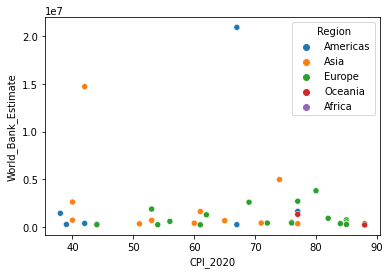

In [11]:
# plot

sns.scatterplot(x = "CPI_2020", y = "World_Bank_Estimate", hue = "Region", data = merge)